**Importing all the python modules we are going to need to process FITS files**

In [1]:
import astropy.visualization as viz
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import astropy.wcs as WCS # you need this astropy module for processing fits files
import matplotlib as mpl
import numpy as np


In [9]:
# reading the header data unit (HDU) of the fits file
hdu = fits.open("xorastro_metadata.fits")
#-->returns an object called an hdu which is a list-like collection of HDU objects

hdu.info() #summarizes the content of the opened FITS file

Filename: xorastro_metadata.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU     25   664393R x 8C   [1K, 1D, 1D, 1E, 1E, 1E, 1E, 1E]   


In [19]:
# reading the fits header 
hdr = hdu[0].header
# reading the image data
img = hdu[1].data

In [64]:

img


FITS_rec([ (1237648702966530336,  183.61266096,  -1.12410199,  19.26183319,  18.12430382,  17.30584526,  16.86145973,  16.59081459),
          (1237648702966661296,  183.90190012,  -1.17398213,  19.33113289,  17.34590721,  16.37807465,  15.93841648,  15.58701324),
          (1237648702966726791,  184.04797157,  -1.1796421 ,  20.44516373,  18.46718597,  17.41731071,  16.98835182,  16.61148262),
          ...,
          (1237674651533705344,  167.23467534,   0.84033291,  20.97434235,  19.0194912 ,  17.82342148,  17.39425659,  17.11013222),
          (1237674288608313592,  119.26630363,  33.08330635,  16.17221642,  14.29859924,  13.44626808,  13.03752804,  12.7362833 ),
          (1237674288608313595,  119.2679208 ,  33.0889979 ,  18.07351303,  16.26642227,  15.47041416,  15.04141235,  14.7676096 )],
         dtype=(numpy.record, [('objid', '>i8'), ('ra', '>f8'), ('dec', '>f8'), ('u', '>f4'), ('g', '>f4'), ('r', '>f4'), ('i', '>f4'), ('z', '>f4')]))

In [21]:
print(np.shape(img))

(664393,)


In [22]:
RA = img["ra"] #right ascention
Dec = img["dec"] #declination

In [31]:
print(RA.shape)

(664393,)


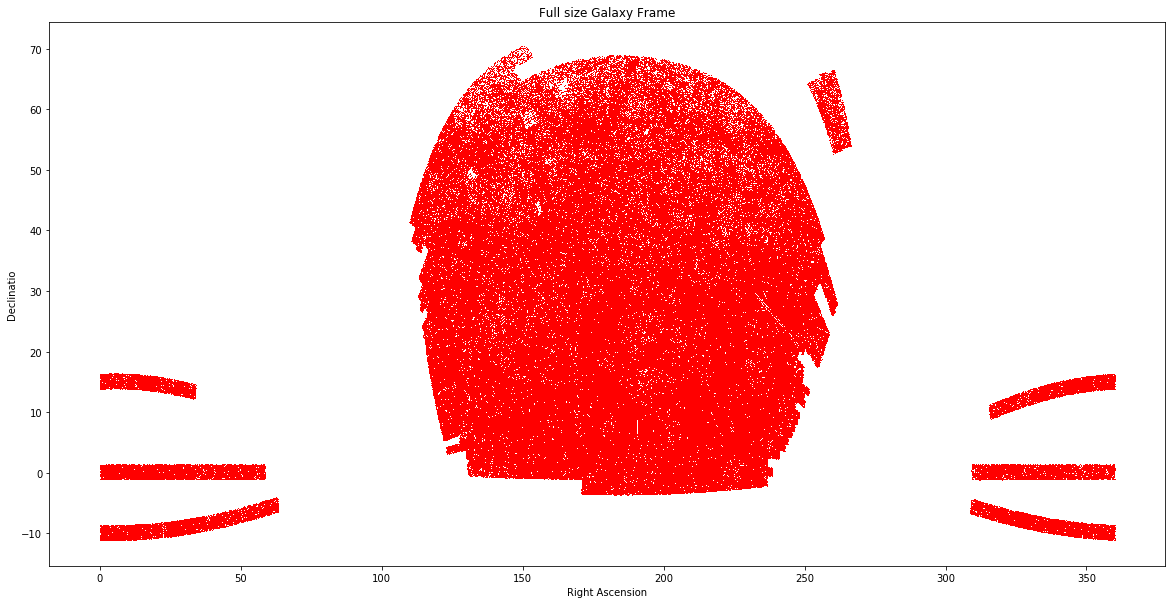

In [42]:
# Plotting the RA and Dec of SDSS data
plt.figure(1, figsize=(20,10))
ax = plt.subplot(1,1,1)
ax.plot(RA, Dec, "r,", )
ax.set_title("Full size Galaxy Frame")
ax.set_xlabel("Right Ascension")
ax.set_ylabel("Declinatio")
plt.savefig("RA_Dec.png")
plt.show()

In [39]:
u = img["u"] 
g = img["g"]
i = img["i"]
r = img["r"]
z = img["z"]

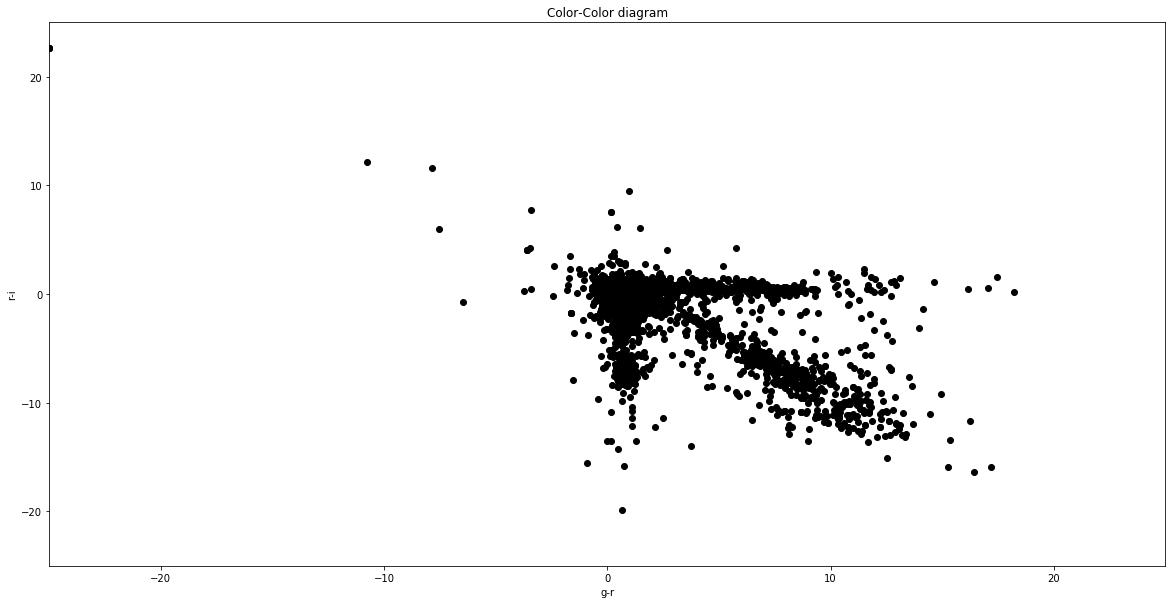

In [65]:
plt.figure(1, figsize=(20,10))
ax = plt.subplot(1,1,1)
ax.plot(g-r, r-i, "ko")
ax.set_title("Color-Color diagram")
ax.set_xlabel("g-r")
ax.set_ylabel("r-i")
ax.set_ylim(-25, 25)
ax.set_xlim(-25, 25)
#plt.colorbar()
plt.savefig("color_color.png")
plt.show()